# Linear Regression on Boston Housing Dataset

#### Hi ! Today we will build a Linear Regression model on the Boston Housing Dataset and predict Median Value of homes.

Lets begin by importing some necessary Python libraries.  
NOTE: The Boston Housing dataset comes built-in with the sklearn library.

## 1. Import required libraries

#### These are the libraries we will need for handling our data and some arithmetic.

In [1]:
import pandas as pd
import numpy as np

#### These are the Data Visualization libraries we will require

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### The below code helps in making the Data visualization plots appear in the notebook itself

In [3]:
%matplotlib inline

## 2. Importing the Data

In [22]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

As we can see from the description of the dataset we have to predict the "Median Value" column. Thus this column will act as our 'label' and we will use all other 13 columns as our 'features'.  
Before we do some Exploratory Data Analysis(EDA) we will try to create one single dataframe with al 14 columns

We will create 2 DataFrames:-  
1. One with the 13 columns using boston.data. The column names for these are boston.feature_names which give us the attributes given in the description.   
2. One with the single column of boston.target. The column name for this will be "MEDIAN VALUE"

In [23]:
boston_df = pd.DataFrame(data = boston.data,columns=boston.feature_names)

In [31]:
target_df = pd.DataFrame(boston.target,columns=['MEDIAN VALUE'])

Now we concatenate the above 2 DataFrames using concat() function of Pandas. Note: we use axis=1 because we are concatenating along the columns.

In [34]:
boston_df = pd.concat([boston_df,target_df],axis=1)

In [35]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDIAN VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have a complete DataFrame with all 14 columns !  
Before we move on to the EDA and ML part, it's always better to **check for any NULL/NaN values** in our dataset.

Below is a **heatmap** of the Boolean dataframe "boston_df.isnull()".  
(Refer this for isnull():-https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.isnull.html)  
A **solid** color indicates **NO NULLS** in the dataset.  
In case we had any nulls we would see those datapoints in a different color in the heatmap.

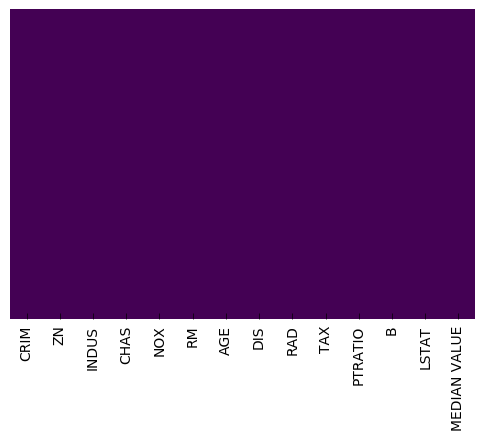

In [41]:
sns.heatmap(data=boston_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

## 3. EDA

Let's begin by doing a simple histogram/distibution plot of the Crime Rate

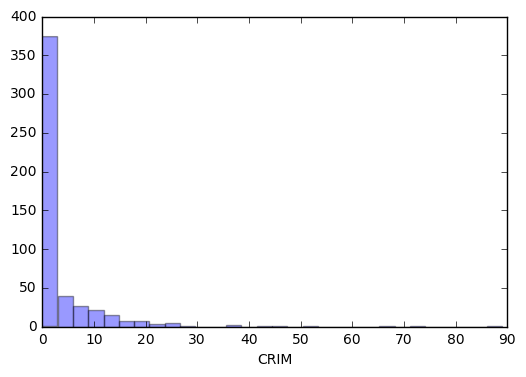

In [46]:
sns.distplot(boston_df['CRIM'],kde=False,bins=30)

Looks like majority of our data has CRIM=0. Thats good to hear considering that crime rate is a very important factor in deciding house pricing.

Now lets see the distribution of the Average Rooms per dwelling.

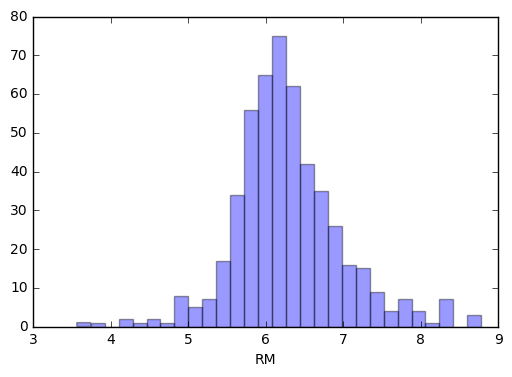

In [51]:
sns.distplot(boston_df['RM'],kde=False)

Looks like the distribution is centred around a mean of 6 rooms per dwelling.

# Now lets move on to the Machine Learning part

## 4. Split the data into Test and Training data

In [58]:
X = boston_df.drop('MEDIAN VALUE',axis=1)

In [59]:
y = boston_df['MEDIAN VALUE']

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 5. Create a model and fit the model using training data

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 6. Evaluate the model

Here we evaluate the model based on its coefficients.  
Using lm.coef_ gives us the models coefficients. We have put all of them in a DataFrame for better understanding.

In [66]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficent'])

In [67]:
cdf

,Coefficent
CRIM,-0.087492
ZN,0.050279
INDUS,0.020679
CHAS,3.754576
NOX,-17.793385
RM,3.241187
AGE,0.012090
DIS,-1.409655
RAD,0.263477
TAX,-0.010338


Interpreting the coefficients:  
Keeping others constant, a **unit increase in NOX**(Nitric Oxide Concentration) will cause a **decrease**(since its -ve) in Median Value by **17.79 units**  
And similarly for the other variables.

## 7. Making Predictions

Now our model needs to predict the 'label' values (in our case Median Value of home) for some unseen 'feature' values.  
Since we had split our dataset into train and test data, we use predict() function on the **X_test** data because these act as  unseen features.

In [68]:
predictions = lm.predict(X_test)

## 8. Metrics and Conclusion

We would like to see how our model predictions line up against the actual labels. We already know the actual labels in **y_test**.  
So we plot as scatterplot of our actual labels vs the predicted labels.  
If the scatterplot is a straight line then our model has done well !

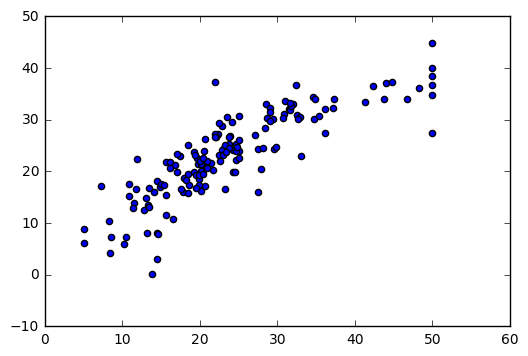

In [70]:
plt.scatter(y_test,predictions)

As seen from the scatterplot our actual values and predicted values do not line up that well as a straight-line.  
Maybe training it on some more feature columns would help. But we dont have any in our dataset so let's settle for what we have.

Now another metric to consider is the distribution of the residuals. The residuals are nothig but the difference/error between the actual and predicted label values.  
We plot the residual histogram below using seaborn's distplot() method.

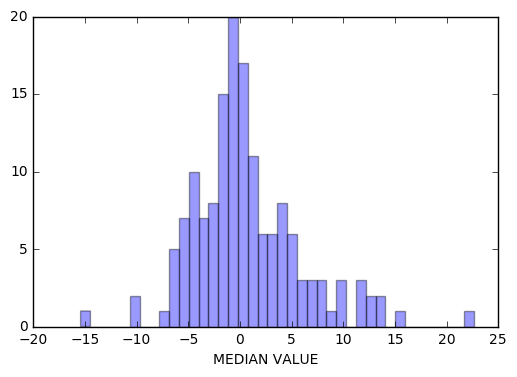

In [72]:
sns.distplot((y_test-predictions),kde=False,bins=40)

As seen from the histogram the residuals seem to be Normally distributed which is as expected. In case we obtained a different distribution, it would mean we need to recheck the choice of model used on the dataset.

Let's look at some more important metrics regarding regression techniques:-  
1. **Mean Absolute Error (MAE)** - mean of absolute value of the errors  
2. **Mean Sqaured Error (MSE)** - mean of the squared errors.  
  Better than MAE because it punishes larger errors.  
3. **Root Mean Sqaured Error (RMSE)** - Square root of the mean of the squared errors.  
  Better than MSE because it is interpretable in the 'y' units

In [79]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3.83652813773
MSE: 28.5511487657
RMSE: 5.34332749938


Another important metric of regression is the **Coefficient of Determination** or the **R^2 score**(R squared score).  
It provides a measure of **how well future samples are likely to be predicted** by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.71236043271716154

## End. Thank You !